In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')

%matplotlib inline

from scipy.stats import gamma, poisson

import epyestim
import epyestim.covid19 as covid19

In [2]:
real_data_path = '/Users/qingyao/OneDrive - cumc.columbia.edu/machine_learning_data/'
cases = pd.read_csv(real_data_path + 'county_data/ts_covid19_confirmed_US_mainland.csv')
cases_sorted = cases.sort_values(by='UID')

In [5]:
cases_sorted.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,03/01/2023,03/02/2023,03/03/2023,03/04/2023,03/05/2023,03/06/2023,03/07/2023,03/08/2023,03/09/2023
0,84001001,US,USA,840,1001,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [3]:
## this is the cumulative cases and start with 2020-01-22, the diff will give the results from 2020-01-23
dates = pd.date_range(start='2020-01-23', periods=344)

In [4]:
# df_fips_sorted.to_csv('fips_sorted.cvs',index=False)
df_fips_sorted = pd.read_csv('fips_sorted.cvs')

In [ ]:
df_incidence_to_concat = []
for fip_i in range(3108): #
    print(fip_i)
    cases_i = cases_sorted.iloc[fip_i,11:356].values
    col_name = cases_sorted.iloc[fip_i,0]
    temp = col_name-84000000
    temp2 = df_fips_sorted.iloc[fip_i].values
    if temp != temp2[0]:
        print(fip_i, temp, temp2[0])
    column_name = str(temp) 
    daily_cases = np.diff(cases_i) 
    
    daily_cases[daily_cases<0] = 0
    df_cases = pd.DataFrame(daily_cases, index=dates, columns=[column_name])
    df_cases.index.name = 'Date'
    df_incidence_to_concat.append(df_cases)
df_incidence = pd.concat(df_incidence_to_concat, axis=1)
# 

In [13]:
df_incidence.to_csv('us_mainland_incidence.csv',index=True)

In [36]:
R_median = pd.read_csv('EpiEstim_R_median.csv')
R_median['Date'] = dates[7:]

In [37]:
R_median.to_csv('df_EpiEstim_R_median.csv',index=False)

In [15]:
ny_R = pd.read_csv('test_ny.csv')
ny_R['Date'] = dates[7:]

In [17]:
ny_R.columns

Index(['Unnamed: 0', 't_start', 't_end', 'Mean(R)', 'Std(R)',
       'Quantile.0.025(R)', 'Quantile.0.05(R)', 'Quantile.0.25(R)',
       'Median(R)', 'Quantile.0.75(R)', 'Quantile.0.95(R)',
       'Quantile.0.975(R)'],
      dtype='object')

In [16]:
ny_R.set_index('Date',inplace=True)

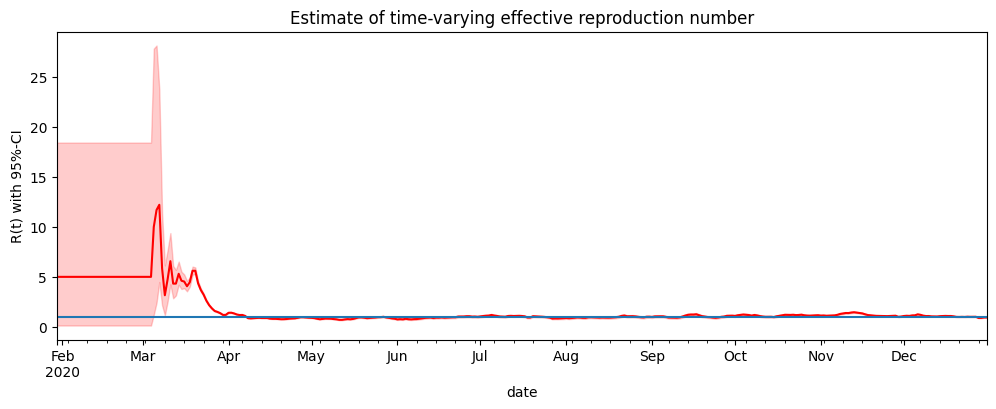

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

ny_R.loc[:,'Mean(R)'].plot(ax=ax, color='red')
ax.fill_between(ny_R.index, 
                    ny_R['Quantile.0.025(R)'], 
                    ny_R['Quantile.0.975(R)'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
# ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number')
plt.show()

In [28]:
ny_R[30:40]

,Unnamed: 0,t_start,t_end,Mean(R),Std(R),Quantile.0.025(R),Quantile.0.05(R),Quantile.0.25(R),Median(R),Quantile.0.75(R),Quantile.0.95(R),Quantile.0.975(R)
Date,,,,,,,,,,,,
2020-02-29,31,32,38,5.000000,5.000000,0.126589,0.256466,1.438410,3.465736,6.931472,14.978661,18.444397
2020-03-01,32,33,39,5.000000,5.000000,0.126589,0.256466,1.438410,3.465736,6.931472,14.978661,18.444397
2020-03-02,33,34,40,5.000000,5.000000,0.126589,0.256466,1.438410,3.465736,6.931472,14.978661,18.444397
2020-03-03,34,35,41,5.000000,5.000000,0.126589,0.256466,1.438410,3.465736,6.931472,14.978661,18.444397
2020-03-04,35,36,42,5.000000,5.000000,0.126589,0.256466,1.438410,3.465736,6.931472,14.978661,18.444397
2020-03-05,36,37,43,10.000000,7.071068,1.211046,1.776808,4.806394,8.391735,13.463173,23.719323,27.858217
2020-03-06,37,38,44,11.695871,6.752614,2.411970,3.187871,6.734090,10.425154,15.284172,24.544929,28.166337
2020-03-07,38,39,45,12.218072,4.988007,4.483817,5.321000,8.591767,11.546406,15.115184,21.408169,23.760753
2020-03-08,39,40,46,5.858972,2.391915,2.150139,2.551597,4.120038,5.536886,7.248233,10.265929,11.394071


In [11]:
cases.columns[11:356] 

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/22/20', '12/23/20', '12/24/20', '12/25/20', '12/26/20', '12/27/20',
       '12/28/20', '12/29/20', '12/30/20', '12/31/20'],
      dtype='object', length=345)

In [6]:
fips_main = pd.read_csv(real_data_path+'county_data/fips_mainland.csv',names=['FIPS'])
df_fips_sorted = fips_main.sort_values(by='FIPS')

In [40]:
si_distrb = covid19.generate_standard_si_distribution()

<BarContainer object of 18 artists>

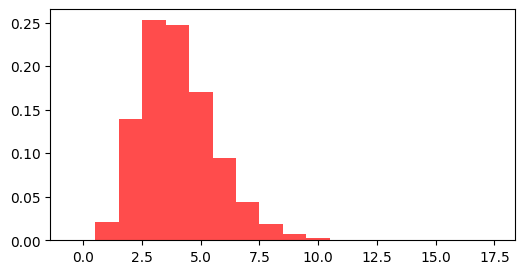

In [6]:
fig = plt.figure( figsize=(6,3))
plt.bar(range(18),si_distrb,width=1,label='paper',alpha=0.7,color='red')

In [49]:
# df_Rmean = df_Rmean.copy()

In [30]:
df_Rmean = pd.concat(dataframes_to_concat, axis=1)

In [49]:
df_R_95 = pd.concat(dataframes_to_concat_std, axis=1)

In [50]:
# df_Rmean.to_csv('df_Rmean_full.csv')
df_R_95.to_csv('df_R_975_full.csv')

In [37]:
np.where(df_Rmean.columns.values == '36061_R_mean')

(array([1824]),)